###Scikit-learn で線形回帰

https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み

import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names) # 説明変数(boston.data)をDataFrameに保存
boston_df['MEDV'] = boston.target # 目的変数(boston.target)もDataFrameに追加

####各変数（データ項目）の説明

変数 | 説明
:-----------|:------------
CRIM | 犯罪発生率
ZN | 25,000平方フィート以上の住宅区画の割合
INDUS | 非小売業種の土地面積の割合
CHAS | チャールズ川沿いかを表すダミー変数
NOX | 窒素酸化物の濃度
RM | 平均部屋数
AGE | 1940年より前に建てられた建物の割合
DIS | 5つのボストンの雇用施設への重み付き距離
RAD | 高速道路へのアクセスのしやすさ
TAX | 10,000ドルあたりの不動産税率
PTRATIO | 生徒と教師の割合
B | 黒人の割合
LSTAT | 低所得者の割合
MEDV | 住宅価格の中央値（1,000単位）

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(boston_df['RM'], boston_df['MEDV']) # 平均部屋数と住宅価格の散布図をプロット

plt.title('Scatter Plot of RM vs MEDV')    # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

In [ ]:
#相関係数を算出するメソッド
boston_df[['RM','MEDV']].corr()

####線形回帰モデルの構築


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = boston_df[['RM']].values         # 説明変数（Numpyの配列）
Y = boston_df['MEDV'].values         # 目的変数（Numpyの配列）

lr.fit(X, Y)                         # 線形モデルの重みを学習

In [ ]:
#学習により得られた、線形モデルの切片 w0w0 はintercept_属性に、説明変数の係数 w1w1 はcoef_属性に格納されます

print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

In [ ]:
plt.scatter(X, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X, lr.predict(X), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

####線形回帰モデルの性能評価
- 残差プロット：残差（目的変数の真値と予測値の差分）を可視化
- 平均二乗誤差：残差平方和をデータ数で正規化した値
- 決定係数：相関係数の二乗

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 0) # データを学習用と検証用に分割

lr = LinearRegression()
lr.fit(X_train, Y_train) # 線形モデルの重みを学習

In [ ]:
Y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測

plt.scatter(Y_pred, Y_pred - Y_test, color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()                                               # 図の表示

In [ ]:
from sklearn.metrics import mean_squared_error

Y_train_pred = lr.predict(X_train) # 学習データに対する目的変数を予測
print('MSE train data: ', mean_squared_error(Y_train, Y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data: ', mean_squared_error(Y_test, Y_pred))         # 検証データを用いたときの平均二乗誤差を出力

In [ ]:
from sklearn.metrics import r2_score

print('r^2 train data: ', r2_score(Y_train, Y_train_pred))
print('r^2 test data: ', r2_score(Y_test, Y_pred))

####重回帰の場合

In [ ]:
#住宅価格（目的変数）と、平均部屋数および低所得者の割合（説明変数）の関係を表現する線形回帰モデル

lr = LinearRegression()

X = boston_df[['RM', 'LSTAT']].values         # 説明変数（Numpyの配列）
Y = boston_df['MEDV'].values         # 目的変数（Numpyの配列）

lr.fit(X, Y)                         # 線形モデルの重みを学習

###線形回帰をPythonで数式から逃げずに実装してみた

https://recruit.cct-inc.co.jp/tecblog/machine-learning/linear-reg/

In [ ]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
 
boston = load_boston()
np.random.seed(1234)

In [ ]:
#単回帰

# ###################### 下準備 #########################
# 説明変数：13項目のうち1つだけ使う
x = boston.data[:, 5]

# 目的変数：住宅価格のデータを使う
y = boston.target

In [ ]:
# ############## 計算式から回帰を実行 ####################
# w0の項を追加するためにxに小細工をする
large_x = np.array([[1, v] for v in x])

# ランダムな値をw0, w1の初期値に設定する
w = np.random.random(len(large_x[0]))

# ちょっと変えるための度合いを決める
alpha = 0.01

In [ ]:
# ------wをちょっとずつ変えていくループを実行------
# ループ回数100回、1000回、10000回、100000回でwを保存する
w_100 = []
w_1000 = []
w_10000 = []

for i in range(100000):
  # 予測値y_hatを計算する。
  y_hat = np.dot(large_x, w)  # 式２－１
  # 損失関数の微分を計算する
  dw = np.dot((y - y_hat), large_x) / len(large_x)  # 式２－５

  # wをちょっとだけ動かす
  # print(i, 'w =', w)
  w += alpha * dw  # 式２－６

  if i == 100-1:
    # listはnp.copyしないとコピー元と同期してしまうので注意！
    w_100 = np.copy(w)
  elif i == 1000-1:
    w_1000 = np.copy(w)
  elif i == 10000-1:
    w_10000 = np.copy(w)

In [ ]:
# ######### skleanのツールLinearRegressionを使って回帰 ###########
lr = LinearRegression(fit_intercept=True)
lr.fit(large_x, y)
pred = lr.predict(large_x)

In [ ]:
 # ########################### 作図 #############################
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)
 
# ----------------計算式の結果-------------------
plt.plot(x, np.dot(large_x, w_100), label='org_100')
plt.plot(x, np.dot(large_x, w_1000), label='org_1000')
plt.plot(x, np.dot(large_x, w_10000), label='org_10000')
plt.plot(x, np.dot(large_x, w), c='black', linewidth=3.0, label='org_100000')
 
# ---------------sklearnの結果------------------
plt.plot(x, pred, c='y', linestyle='dashdot', label='sklearn')
 
plt.legend()
plt.show() #最終的に１００,０００回実行した結果はsklearnのツールを使った線と重なる

In [ ]:
#重回帰

# ###################### 下準備 #########################
# 説明変数：13項目の全項目を使う
# この時点で小細工をしてしまう
large_x = np.array([np.concatenate(([1], v)) for v in boston.data])
 
# 目的変数：住宅価格のデータを使う
y = boston.target

In [ ]:
# ---------------- 説明変数を標準化する -----------------
large_x_ = np.mean(large_x, 0)
large_xs = np.std(large_x, 0)
for i in range(1, len(large_x[0])):
  large_x[:, i] = (large_x[:, i] - large_x_[i]) / large_xs[i]

In [ ]:
# ############## 計算式から回帰を実行 ####################
# ランダムな値をw0, w1の初期値に設定する
w = np.random.random(len(large_x[0]))

# ちょっと変えるための度合いを決める
alpha = 0.01

In [ ]:
# ------wをちょっとずつ変えていくループを実行------
# ループ回数100回、1000回、10000回、100000回でy_hatを保存する
y_hat = []
y_hat_100 = []
y_hat_1000 = []
y_hat_10000 = []

for i in range(100000):
  # 予測値y_hatを計算する。
  y_hat = np.dot(large_x, w)  # 式２－１

  # 損失関数の微分を計算する
  dw = np.dot((y - y_hat), large_x) / len(large_x)  # 式２－５

  # wをちょっとだけ動かす
  # print(i, 'w =', w)
  w += alpha * dw  # 式２－６

  if i == 100-1:
    # listはnp.copyしないとコピー元と同期してしまうので注意！
    y_hat_100 = np.copy(y_hat)
  elif i == 1000-1:
    y_hat_1000 = np.copy(y_hat)
  elif i == 10000-1:
    y_hat_10000 = np.copy(y_hat)

In [ ]:
# ######### skleanのツールLinearRegressionを使って回帰 ###########
lr = LinearRegression(fit_intercept=True)
lr.fit(large_x, y)
pred = lr.predict(large_x)

In [ ]:
# ######################## RMSEを計算する ########################
# -------------- 計算式の結果のループ回数ごとのRMSE --------------
err_100 = y_hat_100 - y
rmse_100 = np.dot(err_100, err_100)/len(y)
err_1000 = y_hat_1000 - y
rmse_1000 = np.dot(err_1000, err_1000) / len(y)
err_10000 = y_hat_10000 - y
rmse_10000 = np.dot(err_10000, err_10000) / len(y)
err_100000 = y_hat - y
rmse_100000 = np.dot(err_100000, err_100000) / len(y)

print('rmse_100:', rmse_100)
print('rmse_1000:', rmse_1000)
print('rmse_10000:', rmse_10000)
print('rmse_100000:', rmse_100000)
 
# ----------------- sklearnの結果で計算したRMSE ------------------
err_lr = pred - y
rmse_lr = np.dot(err_lr, err_lr) / len(y)
print('rmse_lr:', rmse_lr)

#ループ回数が多ければ多いほど徐々に値が小さくなっていき、１０,０００回を超えたあたりからほぼ値が変わらなくなる
#１００,０００回の結果はsklearnで計算した結果とぴたりと同じになる

###Pythonで回帰モデルを作って（使って）みる

https://konchangakita.hatenablog.com/entry/2020/01/05/050000

- データセットの在りか不明

In [ ]:
import pandas as pd
df = pd.read_csv("house_train.csv")
df.shape
(2000, 11)

In [ ]:
#訓練（学習）用データとテスト用データに分割

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df) #75％を学習用データ、25%を検証用
train_df.shape
(1500, 11)

In [ ]:
#予測したい目的変数をprice（価格）とした時によさげな説明変数をさがしてみます

import seaborn as sns
import matplotlib.pyplot as plt

train_df_corr = train_df.corr()
sns.heatmap(train_df_corr, vmax=1, vmin=-1, center=0, annot=True)
plt.tight_layout()
plt.show()

#sqft_living（家の面積）が良さげなので、とりあえずこれを使って実験です

In [ ]:
#まずは線形回帰から、正則化にLasso回帰を使います

#線形回帰と非線形回帰
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

rgs1 = Lasso() #線形回帰

X_test = df["sqft_living"].values.reshape(-1,1) #説明変数を格納
y_test = df["price"] #目的変数を格納
rgs1.fit(X_test, y_test)#家の大きさ, 売却価格の関係を学習.
y = rgs1.predict(np.arange(0,10000).reshape(10000,1))

plt.plot(y, label = "First-order equation")
plt.xlabel("sqft_living" ,size = 15)#x軸のタイトル
plt.ylabel("price", size=15)#y軸のタイトル
plt.scatter(X_test,  y_test,  s=1, c ="r", label = "price_sqftliving") #実際の価格分布
plt.xlim(0, 10000)
plt.legend()
plt.show()#画面に出力
plt.clf()

In [ ]:
#2次式の多項式回帰モデルの作成. 
quadratic_test  = PolynomialFeatures(degree = 2)
X_quadratic_test = quadratic_test.fit_transform(X_test)
rgs2.fit(X_quadratic_test, y_test)
a1, a2 = rgs2.coef_[1:]#係数を取得
b = rgs2.intercept_#切片を取得

X = np.arange(10000)
y_quadratic = a1*X + a2*X**2 + b

#3次式の多項式回帰モデルの作成. 
cubic_test  = PolynomialFeatures(degree = 3)
X_cubic_test = cubic_test.fit_transform(X_test)
rgs3.fit(X_cubic_test, y_test)
a1, a2,  a3= rgs3.coef_[1:]#係数を取得
b = rgs3.intercept_#切片を取得

X = np.arange(10000)
y_cubic = a1*X + a2*X**2 + a3*X**3 +  b

In [ ]:
#欠損データの確認

df.isnull().sum()

In [ ]:
#IDはいらないので削除
del(df["id"])

In [ ]:
#yr_renovated（家が改装された年）に注目

df["yr_renovated"].value_counts()

In [ ]:
#この部分を最近改装された方が点数が高くなるように変換（格付け）してやります

max_renovated = np.max(df["yr_renovated"])#最新年数は2014年

# 5年ごとに格付け
for i in range(1, 11):
    renovated_value = max_renovated - 5*i
    df["yr_renovated"] [df["yr_renovated"] >  renovated_value ]  = 10-i
df["yr_renovated"] [df["yr_renovated"] >  1900]  = 0

In [ ]:
#GridSearchCVをつかってパラメータを設定する
#Lasso回帰におけるパラメータαを"0", "0.0001", "0.001", "0.01"で比較

from sklearn.model_selection import GridSearchCV

#目的変数を正規化
def normalize(x):
    xmean = x.mean()
    xstd  = np.std(x)
    print("平均値：{}、 標準偏差：{}".format(xmean, xstd))
    zscore = (x-xmean)/xstd
    return zscore

rgs = Lasso(normalize=True)#ハイパーパラメータ設定

X_house = df.iloc[:,1:]#price以外の説明変数を格納
y_house = normalize(df.iloc[:, 0])#目的変数を格納

params = {"alpha":[0, 0.0001, 0.001, 0.01],"random_state":[0] }
gs_house = GridSearchCV(rgs, params, cv = 20 , n_jobs =-1,scoring= "neg_mean_squared_error")
gs_house.fit(X_house, y_house)

In [ ]:
#計算結果

gs_house.cv_results_

In [ ]:
gs_house.best_params_

In [ ]:
#学習時の平均値と標準偏差を指定
def normalize_test(x):
    xmean = 532513.975
    xstd  = 366713.522
    zscore = (x - xmean) / xstd
    return zscore

#テスト用でcsvの読み込み
df_test = pd.read_csv("house_test.csv")

#前処理は学習の時と同様に
del(df_test["id"])
max_renovated = 2014
for i in range(1, 11):
    renovated_value = max_renovated - 5*i
    df_test["yr_renovated"] [df_test["yr_renovated"] >  renovated_value ]  = 10-i
df_test["yr_renovated"] [df_test["yr_renovated"] >  1900]  = 0

df_test = df_test.iloc[:,1:] #テスト用データの説明変数を格納
df_ans = normalize_test(df_test.iloc[:, 0]) #テスト用データの目的変数を格納

In [ ]:
#学習済みモデル(線形モデル)を用いて値を予測.
house_pred = gs_house.predict(X_test)

#Xmeanとxstdを用いて価格を復元する. 
xmean = 532513.975
xstd  = 366713.522
#復元しつつみにくいので両方10000で割る.
house_pred1_acutual =   (xstd * house_pred + xmean) /10000
house_ans_acutual=  (xstd * y_house_ans+ xmean)/10000

In [ ]:
#線形回帰の予測値と実際の値の比較.
plt.scatter(house_pred1_acutual, house_ans_acutual, c = "b", s = 1)
plt.plot(range(300), range(300), c = "r")
plt.xlabel("predict value (10**4)", size = 15)
plt.ylabel("actual value (10**4)", size = 15)
plt.title("Linear regression")
plt.xlim(-10, 400)
plt.tight_layout()
plt.show()
plt.clf()

###【線形回帰　Python】

https://py-prog.com/whats-linearregression-model-python-algorithm-how-to-fit-least-square-fit-sample-code-scikit-learn-sklearn/

- コピペ不可のプロテクトされている

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [ ]:
#人工データ生成
seed = np.random.RandomState(1)
kion = 30 * seed.rand(50)
uriage = 2 * kion - 10 + 10 * seed.rand(50)

In [ ]:
np.average( - 10 + 10 * seed.rand(50))

In [ ]:
plt.scatter(kion, uriage)

In [ ]:
uriage_model = LinearRegression()

uriage_model.fit(kion[:, np.newaxis], uriage)

In [ ]:
kion.shape

In [ ]:
kion[:, np.newaxis].shape

In [ ]:
kion_fit = np.linspace(0, 30, 1000)

uriage_fit = uriage_model.predict(kion_fit[:, np.newaxis])

plt.scatter(kion, uriage, c="blue")
plt.plot(kion_fit, uriage_fit, c="red")

In [ ]:
uriage_model.intercept_

In [ ]:
uriage_model.coef_

###Python機械学習！scikit-learnによる単回帰分析

https://watlab-blog.com/2019/12/01/single-regression/

In [ ]:
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# データを用意する
a = 1.0                                                 # 直線の傾き
b = 0.5                                                 # y切片
x = np.arange(1.0, 8.0, 0.2)                            # 横軸を作成
noise = np.random.normal(loc=0, scale=0.5, size=len(x)) # ガウシアンノイズを生成
y = a * x + b + noise                                   # 学習用サンプル波形

In [ ]:
# scikit-learnのmodel.fitではデータの次元を明示する必要がある
# reshapeを使って各データを1Dデータと明示する
#1つ目の引数（ここでは-1で変数の長さ）にデータ長、2つ目に次元（ここでは１次元の波形なので1）を指定
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
 
# 線形回帰をする
model = linear_model.LinearRegression()                 # 線形回帰モデルを定義
model.fit(x, y)                                         # 学習実行
reg_y = model.predict(x)                                # xに対する予測値を計算

In [ ]:
# パラメータ算出
reg_a = model.coef_                                     # 回帰係数
reg_b = model.intercept_                                # 回帰定数
r2 = model.score(x, y)                                  # 決定係数
print(reg_a)
print(reg_b)
print(r2)

In [ ]:
# ここからグラフ描画
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
#plt.rcParams['font.family'] = 'Times New Roman'
#Font family ['Times New Roman'] not found. Falling back to DejaVu Sans

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
 
# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# 軸の範囲設定
ax1.set_xticks(np.arange(0, 20, 2))
ax1.set_yticks(np.arange(0, 20, 2))
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
 
# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# データプロットの準備とともに、ラベルと線の太さ、凡例の設置を行う。
ax1.scatter(x, y, label='Dataset')
ax1.plot(x, reg_y, label='Regression curve', color='red')
plt.legend()
 
# レイアウト設定
fig.tight_layout()
 
# グラフを表示する。
plt.show()
plt.close()

###scikit-learn で線形回帰(単回帰分析・重回帰分析)

https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0

In [ ]:
#sklearn.linear_model.LinearRegression クラスの使い方
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False,
                                      copy_X=True, n_jobs=1)

####sklearn.linear_model.LinearRegression クラスの引数

引数 | 説明
:-----------|:------------
fit_intercept	| False に設定すると切片を求める計算を含めない。目的変数が原点を必ず通る性質のデータを扱うときに利用。 (デフォルト値: True)
normalize	| True に設定すると、説明変数を事前に正規化します。 (デフォルト値: False)
copy_X | メモリ内でデータを複製してから実行するかどうか。 (デフォルト値: True)
n_jobs | 計算に使うジョブの数。-1 に設定すると、すべての CPU を使って計算します。 (デフォルト値: 1)

####sklearn.linear_model.LinearRegression クラスのアトリビュート

アトリビュート | 説明
:-----------|:------------
coef_	| 偏回帰係数
intercept_ | 切片

####sklearn.linear_model.LinearRegression クラスのメソッド

メソッド | 説明
:-----------|:------------
fit(X, y[, sample_weight]) | 線形回帰モデルのあてはめを実行
get_params([deep]) | 推定に用いたパラメータを取得
predict(X) | 作成したモデルを利用して予測を実行
score(X, y[, sample_weight]) | 決定係数 R2を出力
set_params(**params) | パラメータを設定

####赤ワインのデータセット
UC バークレー大学の UCI Machine Leaning Repository にて公開されている、「[Wine Quality Data Set (ワインの品質)](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)」を利用します。

変数 | 説明
:-----------|:------------
fixed acidity	| 酒石酸濃度
volatile acidity	| 酢酸酸度
citric acid	| クエン酸濃度
residual sugar	| 残留糖濃度
chlorides	| 塩化物濃度
free sulfur dioxide	| 遊離亜硫酸濃度
total sulfur dioxide	| 亜硫酸濃度
density	| 密度
pH	| pH
sulphates	| 硫酸塩濃度
alcohol	| アルコール度数
quality	| 0-10 の値で示される品質のスコア


In [1]:
import pandas as pd
import numpy as np
 
wine = pd.read_csv("/content/winequality-red.csv", sep=";")
wine.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.3

In [2]:
#単回帰分析

# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "density (密度)" を利用
#X = wine.loc[:, ['density']].as_matrix()
X = wine.loc[:, ['density']].values
 
# 目的変数に "alcohol (アルコール度数)" を利用
#Y = wine['alcohol'].as_matrix()
Y = wine['alcohol'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))

[-280.16382307]
289.67534338256456
0.2461943643971065


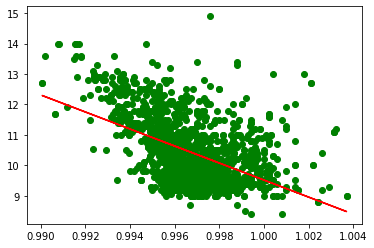

In [3]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y, c="g")
 
# 回帰直線
plt.plot(X, clf.predict(X), c="r")

In [4]:
#重回帰分析

from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine_except_quality = wine.drop("quality", axis=1)
#X = wine_except_quality.as_matrix()
X = wine_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
#Y = wine['quality'].as_matrix()
Y = wine['quality'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

                    Name  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334
21.965208449451815


In [5]:
#各変数を正規化して重回帰分析

from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine2_except_quality = wine2.drop("quality", axis=1)
#X = wine2_except_quality.as_matrix()
X = wine2_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
#Y = wine2['quality'].as_matrix()
Y = wine2['quality'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

                    Name  Coefficients
2            citric acid      0.036513
3         residual sugar      0.047687
7                density      0.048708
0          fixed acidity      0.056479
5    free sulfur dioxide      0.061931
8                     pH      0.105068
6   total sulfur dioxide      0.184775
4              chlorides      0.224532
9              sulphates      0.306056
1       volatile acidity      0.316408
10               alcohol      0.359057
1.2701558656451015e-15


###線形回帰（教師有り学習）

http://www.tsjshg.info/udemy/Lec72-75.html

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

# 住宅価格サンプルデータのロード
boston = load_boston()

# Descriptionは説明です。
print(boston.DESCR)

In [ ]:
# 価格のヒストグラムです。 (これがモデルを作って、最終的に予測したい値です。）
plt.hist(boston.target,bins=50)

plt.xlabel('Price in $1,000s')
plt.ylabel('Number of houses')

In [ ]:
# ラベルがRMになっている5番目の列が、部屋の数です。
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1,000s')
plt.xlabel('Number of rooms')

In [ ]:
# DataFrameを作ります。
boston_df = DataFrame(boston.data)

# 列名をつけます。
boston_df.columns = boston.feature_names

boston_df.head()

In [ ]:
boston_df['Price'] = boston.target
boston_df.head()

In [ ]:
# lmplotを使って、回帰直線を引きます。
sns.lmplot(x = 'RM', y = 'Price', data = boston_df)

In [ ]:
# 最小二乗法のイメージ図
# wikipediaから拝借します。
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

In [ ]:
# 部屋数
X = boston_df.RM
print("X.shape : ", X.shape)
#print("X : ", X)



In [ ]:
'''
これは不要な処理だった模様

# これを2次元のarrayにします。
X = np.vstack(boston_df.RM)
print("X.shape : ", X.shape)
#print("X : ", X)

In [ ]:
Y = boston_df.Price
print(Y.shape)

In [ ]:
# Numpyのlinalg.lstsqの覚書　：　https://stmind.hatenablog.com/entry/20120424/1335307505

from pylab import *
from numpy import *

x = arange(-3, 10, 0.05)
#print("x.shape : ", x.shape)
#shape(x) = (260,)

y = 2.5 * exp(-(x)**2/9) + 3.2 * exp(-(x-0.5)**2/4) + random.normal(0.0, 1.0, len(x))
#print("y.shape : ", y.shape)
# shape(y) = (260,)

nParam = 2
A = zeros((len(x), nParam), float)
A[:,0] = exp(-(x)**2/9)
A[:,1] = exp(-(x-0.5)**2/4)
#print("A.shape : ", A.shape)
# shape(A) = (260, 2)

(p, residuals, rank, s) = linalg.lstsq(A, y, -1)
# p = array([ 1.84768272,  4.06911899])
# residuals = array([ 228.82195325])
# rank = 2
# s = array([ 10.989164  ,   1.70740154])

plot(x, y, '.')
plot(x, p[0]*A[:,0]+p[1]*A[:,1],'x')

show()

In [ ]:
# Xを[X 1]の形にします。
X = np.array( [ [value,1] for value in X ] )
print("X : ", X)
print("X.shape : ", X.shape)
#print("Y.shape : ", Y.shape)

# 最小二乗法の計算を実行します。
#a, b = np.linalg.lstsq(X, Y,)[0]

##`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
##To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


a, b  = np.linalg.lstsq(X, Y, None)[0]
#a = p[0]
print("a : ", a)
#b = p[1]
print("b : ", b)


In [ ]:
# まずは元のデータをプロットします。
plt.plot(boston_df.RM,boston_df.Price,'o')

# 求めた回帰直線を描きます。
x= boston_df.RM
plt.plot(x, a*x + b,'r')


In [ ]:
# 結果のarrayを取得します。
result = np.linalg.lstsq(X,Y, None)

In [ ]:
# 2つ目の要素に、誤差の合計が入っています。
error_total = result[1]

# 誤差の平均値の平方根を計算します。
rmse = np.sqrt(error_total/len(X) )

print('平均二乗誤差の平方根は、{:0.2f}'.format(rmse[0]))

####重回帰分析

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [ ]:
# 説明変数
X_multi = boston_df.drop('Price',1)

# 目的変数
Y_target = boston_df.Price

In [ ]:
# モデルを作ります。
lreg.fit(X_multi,Y_target)

In [ ]:
print('切片の値は{:0.2f}'.format(lreg.intercept_))

print('係数の数は{}個'.format(len(lreg.coef_)))

In [ ]:
# 新しいDataFrameを作ります。
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

#求められた係数を代入します。
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

coeff_df

In [ ]:
# 説明変数をX、目的変数をYとして受け取ります。
#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X_multi,boston_df.Price)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,boston_df.Price)

# どんな感じに分かれたか、確認してみます。
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [ ]:
# まずはインスタンスを作ります。
lreg = LinearRegression()

# fitでモデルを作りますが、使うのは学習用のデータだけです。
lreg.fit(X_train,Y_train)

pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)


print('X_trainを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_train - pred_train) ** 2)))    
print('X_testを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_test - pred_test) ** 2)))

In [ ]:
# 学習用のデータの残差プロットです。
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用のデータの残差プロットです。
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平な線を描いておきます。
plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

###pythonのscikit-learnライブラリで線形回帰を学ぶ

https://note.com/adhdit/n/n057c6ee6eccb

In [ ]:
from sklearn import linear_model, datasets
from pandas import DataFrame

boston = datasets.load_boston()
print(type(boston))

In [ ]:
for boston_key in boston:
   print(boston_key)

In [ ]:
#順番に中身を確認
print(boston["data"])

In [ ]:
print(boston["target"])

In [ ]:
#データの説明が入っています
print(boston['DESCR'])

In [ ]:
#これはロードしたデータがどこに保存されたかがわかります
print(boston['filename'])

In [ ]:
#pandasを使ってDataFrame化
dframe = DataFrame(boston.data)

In [ ]:
#辞書bostonのキー"data"のvalueのリストの0番目がどうだったか見てみましょう
print(boston["data"][0])

#0番目のリストの値が、二次元の表になっている

In [ ]:
#feature_namesから列名を取得
print(boston.feature_names)

In [ ]:
#columnsパラメータで列名を指定
dframe.columns = boston.feature_names

#確認
print(dframe)

In [ ]:
#DataFrameに「target」の列と値を追加
dframe['MEDV'] = boston.target

dframe.head()

In [ ]:
dframe[['RM','MEDV']].corr()

In [ ]:
#相関関係をプロットして視覚的に考えてみましょう
boston = datasets.load_boston()
dframe = DataFrame(boston.data)
dframe.columns = boston.feature_names
rm = dframe['RM']
medv = boston.target #medv = dframe['MEDV']
plt.scatter(rm, medv)
plt.title('title')
plt.xlabel('X_RM')
plt.ylabel('Y_MEDV')
plt.grid()
plt.show()

In [ ]:
#線形回帰モデルを作る
room_training = DataFrame(dframe['RM'])
#指定した列のみが抜き出されます

print(room_training)

In [ ]:
#targetの情報もDataFrame化
prices_training = DataFrame(boston.target)

print(prices_training)

In [ ]:
#抜き出した「RM」のデータと「target」のデータを使ってモデルを作っていきましょう
Linear_Regression = linear_model.LinearRegression()
Linear_Regression.fit(room_training,prices_training)

plt.scatter(room_training, prices_training, color = 'blue')
plt.plot(room_training, Linear_Regression.predict(room_training), color = 'red') 
plt.show()

###Pythonで重回帰分析を行う方法を現役エンジニアが解説【初心者向け】

https://techacademy.jp/magazine/34209

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# データの読み込み
from sklearn.datasets import load_boston

boston = load_boston()

dataset = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
dataset['price'] = boston['target']
dataset.head()

In [ ]:
# 目的変数(Y)、説明変数(X)
Y = np.array(dataset['price'])
X = np.array(dataset[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
 'TAX', 'PTRATIO', 'B', 'LSTAT']])

In [ ]:
#線形回帰モデル
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#学習はfit
model.fit(X_train, Y_train)

In [ ]:
Y_pred = model.predict(X_test)

print(Y_test[:5])
print(Y_pred[:5])

In [ ]:
plt.scatter(Y_test, Y_pred)

###機械学習やってみた　～線形回帰～

https://www.sun-m.co.jp/blog/tips/132.html

####線形回帰とは
- 線形回帰とは、データの分布があるときに、そのデータに一番当てはまる直線を求める分析手法の一種です
- ２次元で表現できるデータを取り扱うのであれば、与えられたデータから $y = ax + b$ の直線を求めることになります
- $x$ のことを説明変数、 $y$ のことを目的変数と呼んだりします
- この直線を求めることによって、ある説明変数 $x$ が与えられたとき、相関のある目的変数 $y$ を予測することができます
- 今回、線形回帰のプログラムを実装して、実際に運用中の DB サーバの容量がいつ枯渇する（いつアラートが発生する）のかを予測してみました


In [ ]:
#最小二乗法による実装

import math
from typing import Tuple

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style

In [ ]:
def least_square(data_x, data_y) -> Tuple[float, float]:
  """最小二乗法
  Parameters
  ----------
  data_x: ndarray
  data_y: ndarray
  """
  avg_x: float = np.mean(data_x)
  avg_y: float = np.mean(data_y)

  numerator: float = np.sum((data_x - avg_x) * (data_y - avg_y))
  denominator: float = np.sum((data_x - avg_x) ** 2)

  a = numerator / denominator
  b = avg_y - (a * avg_x)

  return a, b

In [ ]:
def linear_function(x, a: float, b: float):
  """回帰直線
  Parameters
  ----------
  x: Union[ndarray, float]
  Returns
  -------
  result: Union[ndarray, float]
  """

  return a * x + b

In [ ]:
def main():
  # データの読み込み：「計測日数」と「使用容量」というカラムがあるとします
  df = pd.read_excel("./sample_data.xlsx")
  data = df[["計測日数", "使用容量"]].dropna()

  data_x = data["使用容量"].values
  data_y = data["計測日数"].values

  # 最小二乗法によりパラメータを求める
  a, b = least_square(data_x, data_y)

  used_capacity = <アラート発生しきい値>
  limit = math.floor(linear_function(used_capacity, a, b))
  message = "アラート発生まであと {} 日"

  print(message.format(limit - data_y[-1]))

  # グラフ表示
  style.use("ggplot")
  fig, ax = plt.subplots(figsize=(20, 8))

  x_range = np.linspace(start=0, stop=data_x[-1] * 1.1, num=2)
  ax.plot(x_range, linear_function(x_range, a, b), color="#377eb8")
  ax.scatter(data_x, data_y, color="#e41a1c")
  ax.set_xlabel("KB")
  ax.set_ylabel("day")

  plt.show()

In [ ]:
if __name__ == "__main__":
    main()

In [ ]:
#勾配法による実装

def standardize(data):
  """標準化を行う
  Parameters
  ----------
  data: ndarray
  Returns
  -------
  standardized_data: ndarray
  mean: float
  std: float
  """

  mean = data.mean()
  std = data.std()

  return (data - mean) / std, mean, std

In [ ]:
def linear_function(x, p0: float, p1: float):
  """回帰直線
  Parameters
  ----------
  x: Union[ndarray, float]
  Returns
  -------
  result: Union[ndarray, float]
  """

  return p0 + p1 * x

In [ ]:
def calculate_error(x, y, p0: float, p1: float) -> float:
  """誤差を求める
  Parameters
  ----------
  x: ndarray
  y: ndarray
  """

  error: float = 0.5 * np.sum((y - linear_function(x, p0, p1)) ** 2)

  return error

In [ ]:
def gradient(x, y):
  """勾配法
  Parameters
  ----------
  x: ndarray
  y: ndarray
  """

  # 初期パラメータはランダム
  p0 = np.random.rand()
  p1 = np.random.rand()

  LNR = 1e-4  # 学習率
  updated_count = 0

  difference = before = calculate_error(x, y, p0, p1)

  while difference > 1e-4:
    # パラメータ更新
    p0 = p0 - LNR * np.sum((linear_function(x, p0, p1) - y))
    p1 = p1 - LNR * np.sum((linear_function(x, p0, p1) - y) * x)

    after = calculate_error(x, y, p0, p1)

    difference = before - after
    before = after
    updated_count += 1

    log = "({}) Φ0: {:.3f} Φ1: {:.3f} diff: {:.5f}"
    print(log.format(updated_count, p0, p1, difference))

  return p0, p1

In [ ]:
def main():
  # データの読み込み
  df = pd.read_excel("./sample_data.xlsx")
  data = df[["計測日数", "使用容量"]].dropna()

  data_x = data["使用容量"].values
  data_y = data["計測日数"].values

  # 標準化
  standardized, mean, std = standardize(data_x)

  # 勾配法によりパラメータを求める
  p0, p1 = gradient(standardized, data_y)

  used_capacity = <アラート発生しきい値>
  # 説明変数も標準化
  standardized_used_capacity = (used_capacity - mean) / std
  limit = math.floor(linear_function(standardized_used_capacity, p0, p1))
  message = "アラート発生まであと {} 日"

  print(message.format(limit - data_y[-1]))

  # グラフ表示
  style.use("ggplot")
  fig, ax = plt.subplots(figsize=(20, 8))

  x_range = np.linspace(start=-2, stop=2, num=2)
  ax.plot(x_range, linear_function(x_range, p0, p1), color="#377eb8")
  ax.scatter(standardized, data_y, color="#e41a1c")
  ax.set_ylabel("day")

  plt.show()

In [ ]:
if __name__ == "__main__":
    main()

####まとめ
- 最小二乗法では、方程式を解くことによりパラメータの解析解を求めることで回帰直線を得ることができました
- また勾配法では、パラメータの学習によって数値解を求めることで回帰直線を得ることができました